In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import itertools
warnings.filterwarnings('ignore')

# Data Cleaning

In [5]:
n = 10
df_cleaned = pd.read_csv(r'C:\Users\LENOVO\Desktop\predict recession\current.csv')[:-1].dropna(axis=1, thresh=n).fillna(method='ffill')
df_cleaned.rename(columns={'sasdate': 'Date'}, inplace=True)
df_cleaned

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,2.0,6476.00,12298.00,84.2043,1.0000
2,2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,2.0,6476.00,12298.00,83.5280,1.0000
3,3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,2.0,6508.00,12349.00,81.6405,1.0000
4,4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,2.0,6620.00,12484.00,81.8099,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,7/1/2024,19988.217,16306.3,120.966,1.529744e+06,710851.00000,102.5192,100.5344,100.2938,101.3583,...,119.776,127.972,31.20,35.70,27.96,66.4,548691.61,930374.96,5278.3525,14.4084
788,8/1/2024,20007.209,16322.1,121.052,1.530317e+06,710038.00000,103.0135,100.9825,100.9803,102.2118,...,119.653,128.291,31.26,35.81,27.97,67.9,551667.22,933066.90,5327.6461,19.6750
789,9/1/2024,20044.142,16333.7,121.690,1.541305e+06,716388.00000,102.5969,100.3826,100.0630,101.9696,...,119.220,128.682,31.44,36.00,28.11,70.1,553347.06,934283.59,5368.5818,17.6597
790,10/1/2024,20128.752,16397.9,121.948,1.539382e+06,720393.00000,102.0854,99.5434,98.9267,101.3127,...,119.064,129.169,31.55,36.22,28.14,70.5,554377.25,937299.96,5407.3304,19.9478


In [6]:
class MacroDataProcess:
    # Stationarity transofrmation
    # Add lag of the features

    def __init__(self,macro_data):
        self.data =macro_data
        self.transformation_codes = None

    def transform(self, df_col, code):
        """
        Transforms each column of dataframe (df_col) according to code

        """
        if code == 1:
            df_col.apply(lambda x: x)
            return df_col
        elif code == 2:
            df_col = df_col.diff()
            return df_col
        elif code == 3:
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 4:
            df_col = df_col.apply(np.log)
            return df_col
        elif code == 5:
            df_col = df_col.apply(np.log)
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 6:
            df_col = df_col.apply(np.log)
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 7:
            df_col = df_col.pct_change()
            df_col = df_col.diff()
            return df_col

    def stationarity(self):
        """
        Clean macro dataset and perform necessary changes
        """
        # Keep transformation codes for each variable in a dictionary 
        transformation_codes = {}
        df_tmp=pd.DataFrame(columns = self.data.columns)
        for col in self.data.columns:
            df_tmp[col]= self.data[col].iloc[1:] 
            transformation_codes[col] = self.data[col].iloc[0]
        df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])

        self.data=df_tmp
        self.tansformation_codes = transformation_codes
        # Make each feature stationary 
        data_transformed: DataFrame = pd.DataFrame(columns=self.data.columns)
        for col in self.data.columns:
            if col == 'Date':
                data_transformed[col] = self.data[col]
            else:
                data_transformed[col] = self.transform(self.data[col], transformation_codes[col])
        self.data = data_transformed

    def add_lag(self,lag_values):
        for col in self.data.drop(['Date'], axis=1):
            for n in lag_values:
                self.data['{} {}M lag'.format(col, n)] = self.data[col].shift(n).ffill().values
        self.data.dropna(axis=0, inplace=True)
        return self.data

In [7]:
df = MacroDataProcess(macro_data = df_cleaned)
df.stationarity()
lag_values = [1,3,6,9,12]
df_macro= df.add_lag(lag_values)

In [8]:
df_macro=df_macro.set_index('Date')
df_macro


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 1M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag
Date,,,,,,,,,,,,,,,,,,,,,
1960-03-01,0.003024,0.001811,0.018449,-0.013636,0.002594,-0.017958,-0.009113,-0.004587,-0.010303,-0.033823,...,-0.037926,-0.000688,-0.027018,-0.038791,-0.030921,1.0000,1.0000,1.0000,1.0000,1.0000
1960-04-01,0.005341,0.004518,0.029391,-0.018187,0.024801,-0.016978,-0.001141,0.000000,0.008033,-0.021156,...,-0.053379,-0.005654,-0.014082,-0.021701,-0.020784,1.0000,1.0000,1.0000,1.0000,1.0000
1960-05-01,0.005870,0.006039,-0.005049,-0.021665,0.010857,-0.009099,0.007979,0.008015,0.012578,0.008270,...,-0.025753,-0.037926,-0.013266,-0.017855,-0.011197,1.0000,1.0000,1.0000,1.0000,1.0000
1960-06-01,0.003169,0.002192,-0.020601,-0.022965,-0.016411,-0.013795,-0.005721,-0.004603,-0.001143,-0.001185,...,0.002181,-0.053379,-0.000688,-0.027018,-0.038791,1.0000,1.0000,1.0000,1.0000,1.0000
1960-07-01,0.002555,0.001680,0.001811,0.001687,-0.011463,-0.016132,-0.017171,-0.017253,-0.016035,-0.049437,...,-0.004001,-0.025753,-0.005654,-0.014082,-0.021701,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,0.001871,0.000896,0.005695,0.011933,0.009246,-0.004482,-0.003260,-0.004734,-0.004769,-0.059511,...,0.014373,0.009577,0.017335,-0.014706,-0.009811,12.6826,16.4023,13.3453,19.0462,13.8333
2024-08-01,0.002270,0.001840,0.005044,0.007537,0.010887,-0.002326,-0.003015,-0.001438,-0.001806,-0.011521,...,0.019895,-0.006742,0.004130,-0.012364,-0.013766,14.4084,12.8609,13.8808,13.8563,15.7822
2024-09-01,0.002794,0.001679,0.005967,0.007529,0.007759,0.000758,-0.001511,-0.002304,0.006013,0.045272,...,0.017146,0.014373,0.018737,0.010477,-0.014359,19.6750,12.6826,13.7658,12.6960,15.0424


#  Data manipulation

* https://fred.stlouisfed.org/series/USRECD
* https://research.stlouisfed.org/econ/mccracken/fred-databases/

In [ ]:
from fredapi import Fred
key='put your key'

fred = Fred(api_key=key)

df_regime=pd.DataFrame(fred.get_series('USRECD'),columns=['Regime'])

df_regime.head()

,Regime
1854-12-01,1.0
1854-12-02,1.0
1854-12-03,1.0
1854-12-04,1.0
1854-12-05,1.0


In [14]:
forecast_windows=[1,2,4]

df=pd.concat([df_macro,df_regime],axis=1).dropna()
for i in forecast_windows:
    df['Regime'+str(i)]=df['Regime'].shift(-i)
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag,Regime,Regime1,Regime2,Regime4
1960-03-01,0.003024,0.001811,0.018449,-0.013636,0.002594,-0.017958,-0.009113,-0.004587,-0.010303,-0.033823,...,-0.030921,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1960-04-01,0.005341,0.004518,0.029391,-0.018187,0.024801,-0.016978,-0.001141,0.000000,0.008033,-0.021156,...,-0.020784,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1960-05-01,0.005870,0.006039,-0.005049,-0.021665,0.010857,-0.009099,0.007979,0.008015,0.012578,0.008270,...,-0.011197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1960-06-01,0.003169,0.002192,-0.020601,-0.022965,-0.016411,-0.013795,-0.005721,-0.004603,-0.001143,-0.001185,...,-0.038791,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1960-07-01,0.002555,0.001680,0.001811,0.001687,-0.011463,-0.016132,-0.017171,-0.017253,-0.016035,-0.049437,...,-0.021701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
split_date = '1975-09-01' # train and test set split date
df_train, df_test = df[df.index < split_date], df[df.index>= split_date]
target_col = 'Regime'
feature_col = df.columns.drop(['Regime'])

# Model Fitting

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
                                              0.0/124.9 MB ? eta -:--:--
                                              0.0/124.9 MB 1.4 MB/s eta 0:01:32
                                            0.1/124.9 MB 660.6 kB/s eta 0:03:09
                                              0.2/124.9 MB 1.2 MB/s eta 0:01:40
                                              0.3/124.9 MB 1.6 MB/s eta 0:01:20
                                              0.4/124.9 MB 1.8 MB/s eta 0:01:10
                                              0.5/124.9 MB 1.8 MB/s eta 0:01:11
                                              0.5/124.9 MB 1.8 MB/s eta 0:01:11
                                              0.5/124.9 MB 1.8 MB/s eta 0:01:11
                                              0.5/124.9 MB 1.8 MB/s eta 0:01:11
                                              0.5/124.9 MB 1.8 MB/s eta 0:01:11
                                           

In [18]:
from xgboost import XGBClassifier
import itertools
parameters={'random_state': [100],'max_depth': [3,5,6],'n_estimators': [100,300],'objective': ['binary:logistic'],'booster': ['gbtree']}
parameters_=list((dict(zip(parameters, x)) for x in itertools.product(*parameters.values())))

In [19]:
df_train.iloc[:,:-4]

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 1M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag
1960-03-01,0.003024,0.001811,0.018449,-0.013636,0.002594,-0.017958,-0.009113,-0.004587,-0.010303,-0.033823,...,-0.037926,-0.000688,-0.027018,-0.038791,-0.030921,1.0000,1.0000,1.0000,1.0000,1.0000
1960-04-01,0.005341,0.004518,0.029391,-0.018187,0.024801,-0.016978,-0.001141,0.000000,0.008033,-0.021156,...,-0.053379,-0.005654,-0.014082,-0.021701,-0.020784,1.0000,1.0000,1.0000,1.0000,1.0000
1960-05-01,0.005870,0.006039,-0.005049,-0.021665,0.010857,-0.009099,0.007979,0.008015,0.012578,0.008270,...,-0.025753,-0.037926,-0.013266,-0.017855,-0.011197,1.0000,1.0000,1.0000,1.0000,1.0000
1960-06-01,0.003169,0.002192,-0.020601,-0.022965,-0.016411,-0.013795,-0.005721,-0.004603,-0.001143,-0.001185,...,0.002181,-0.053379,-0.000688,-0.027018,-0.038791,1.0000,1.0000,1.0000,1.0000,1.0000
1960-07-01,0.002555,0.001680,0.001811,0.001687,-0.011463,-0.016132,-0.017171,-0.017253,-0.016035,-0.049437,...,-0.004001,-0.025753,-0.005654,-0.014082,-0.021701,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975-04-01,0.001955,-0.001199,-0.000989,-0.020529,-0.009139,-0.009145,0.000512,0.008895,0.023535,0.050423,...,0.028593,0.019431,-0.005318,-0.010488,0.013654,24.0618,26.7976,38.3682,29.7672,20.7668
1975-05-01,0.007306,0.004130,0.020926,0.009738,0.058955,-0.001006,0.009166,0.013488,0.025488,0.062627,...,0.056546,-0.000165,0.009669,-0.007443,-0.008827,22.6474,22.9871,27.2538,29.1721,22.2272
1975-06-01,0.023380,0.007332,0.021214,0.008720,0.044103,0.003377,0.006134,0.009278,0.018087,0.034180,...,0.036943,0.028593,0.030845,0.000785,-0.009733,21.0543,24.0618,28.2313,36.7628,23.7680
1975-07-01,0.006205,0.001620,0.005457,0.013904,0.014398,0.016668,0.021540,0.024791,0.038903,0.059733,...,0.030292,0.056546,0.019431,-0.005318,-0.010488,18.9576,22.6474,26.7976,38.3682,29.7672


In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from tqdm import tqdm

acc=[]
accuracy=[]
for param in tqdm(parameters_):
    tscv = TimeSeriesSplit(n_splits=3)
    model = XGBClassifier(**param)
    for train_index, test_index in tscv.split(df_train):
        X_train, X_test = df_train.iloc[train_index,:-4], df_train.iloc[test_index,:-4]
        y_train, y_test = df_train.iloc[train_index,-4:], df_train.iloc[test_index,-4:]
        model.fit(X_train, y_train)
        
        y_pr = model.predict(X_test)

        # scoring
        a=np.zeros(len(forecast_windows))
        c=0
        for i in forecast_windows:
            a[c]=(accuracy_score(y_test.iloc[:,c],y_pr[:,c]))
            c+=1
        acc.append(np.mean(a))
    accuracy.append(np.mean(acc))

best_param = parameters_[np.argmax(accuracy)]
best_param

100%|██████████| 6/6 [00:30<00:00,  5.12s/it]


{'random_state': 100,
 'max_depth': 3,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'booster': 'gbtree'}

In [21]:
predicted=[]
binary=[]

roll=0

X=df.iloc[:,:-4]
y=df.iloc[:,-4:]

for i in tqdm(range(len(df_train)+forecast_windows[-1],len(X))):
    model = XGBClassifier(**best_param)
    if roll>0:
        X_fit = X.iloc[i-roll:i-forecast_windows[-1]]
        y_fit = y.iloc[i-roll:i-forecast_windows[-1]]
    if roll==0:
        X_fit = X.iloc[:i-forecast_windows[-1]]
        y_fit = y.iloc[:i-forecast_windows[-1]]

    model = model.fit(X_fit, y_fit)

    X_predict = X.iloc[i:i+ 1]
    y_pred = model.predict(X_predict)


    binary.append(y_pred)

    y_pro=model.predict_proba(X_predict)
    predicted.append(y_pro)


  0%|          | 0/587 [00:00<?, ?it/s]

100%|██████████| 587/587 [32:16<00:00,  3.30s/it]


In [22]:
plt.style.use("dark_background")

In [23]:
pred_df=pd.DataFrame(np.concatenate(predicted),index=df_test.index[forecast_windows[-1]:])
pred_df=pd.concat([pred_df,df_test.iloc[forecast_windows[-1]:,-4]],axis=1)
pred_df

,0,1,2,3,Regime
1976-01-01,0.005398,0.005403,0.057029,0.006305,0.0
1976-02-01,0.003388,0.009532,0.061298,0.006848,0.0
1976-03-01,0.003200,0.009164,0.081596,0.016064,0.0
1976-04-01,0.003975,0.004775,0.023098,0.065235,0.0
1976-05-01,0.001360,0.002495,0.005847,0.050008,0.0
...,...,...,...,...,...
2024-07-01,0.008865,0.002977,0.030551,0.223876,0.0
2024-08-01,0.001349,0.002004,0.018567,0.017080,0.0
2024-09-01,0.000590,0.001228,0.008598,0.003669,0.0
2024-10-01,0.000826,0.005670,0.010141,0.004216,0.0


In [24]:
f_=[0]+forecast_windows
for i in range(0,len(f_)):
    pred_df[i]=pred_df[i].shift(f_[i])
pred_df

,0,1,2,3,Regime
1976-01-01,0.005398,NaN,NaN,NaN,0.0
1976-02-01,0.003388,0.005403,NaN,NaN,0.0
1976-03-01,0.003200,0.009532,0.057029,NaN,0.0
1976-04-01,0.003975,0.009164,0.061298,NaN,0.0
1976-05-01,0.001360,0.004775,0.081596,0.006305,0.0
...,...,...,...,...,...
2024-07-01,0.008865,0.002117,0.002536,0.013131,0.0
2024-08-01,0.001349,0.002977,0.007717,0.027142,0.0
2024-09-01,0.000590,0.002004,0.030551,0.008068,0.0
2024-10-01,0.000826,0.001228,0.018567,0.012918,0.0


In [25]:
pred_df.columns=['Nowcasting','1 month ahead','2 months ahead','4 months ahead','Actual']

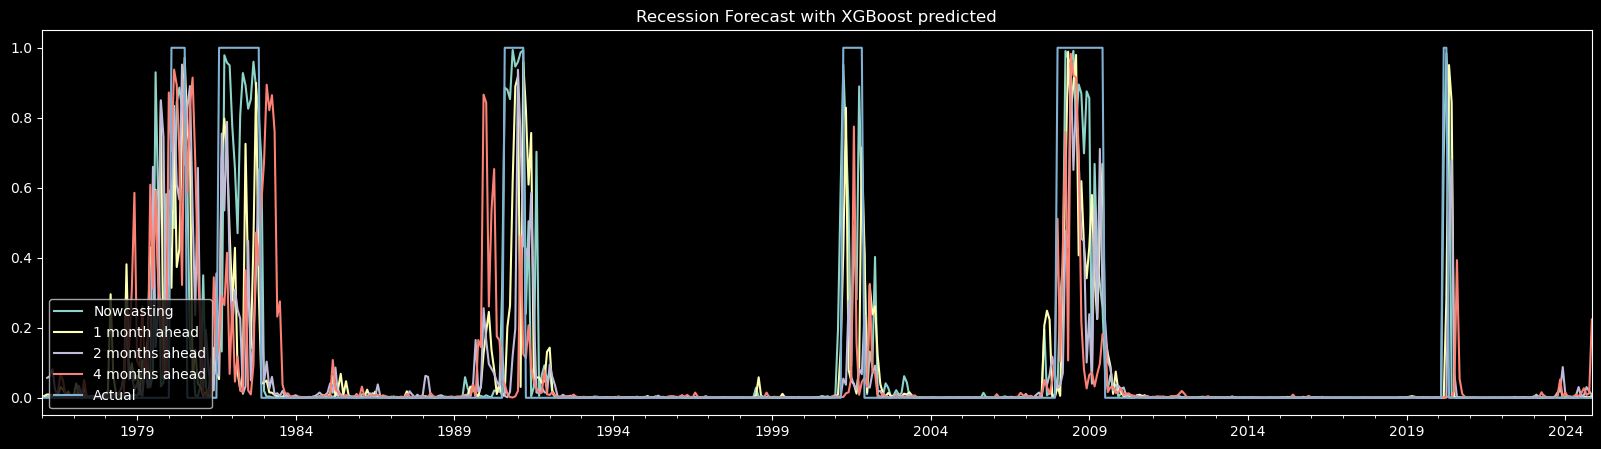

In [26]:
pred_df.plot(figsize=(20,5))
plt.title('Recession Forecast with XGBoost predicted')
plt.legend(loc='lower left')
plt.show()

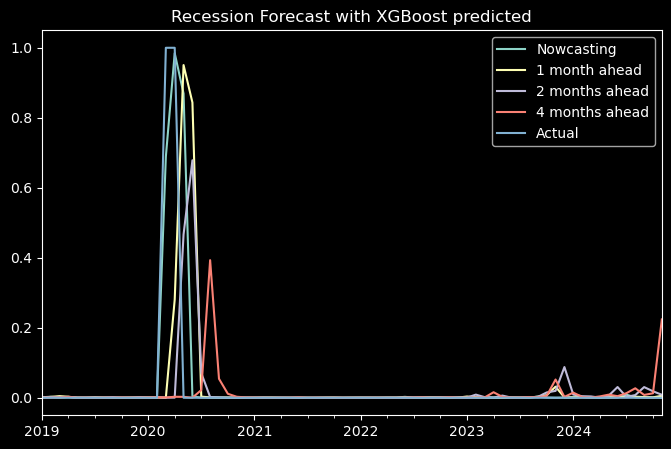

In [27]:

pred_df['2019':].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost predicted')
plt.show()

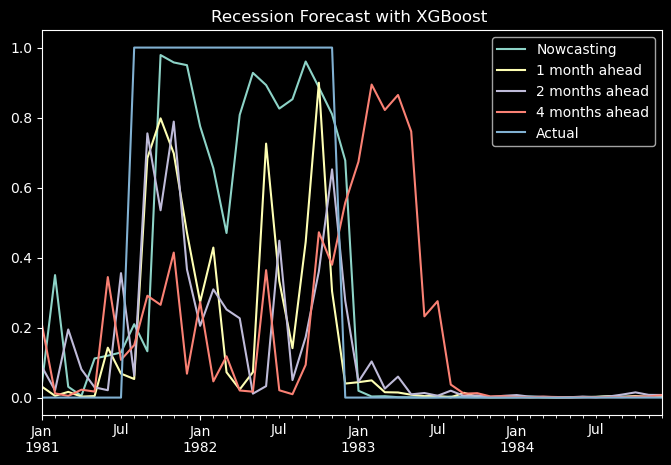

In [28]:
pred_df['1981':'1984'].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost ')
plt.show()

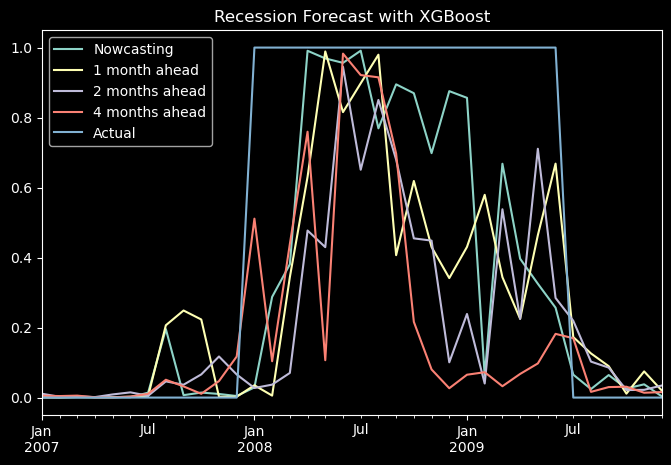

In [29]:
pred_df['2007':'2009'].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost')
plt.show()